In [1]:
import numpy as np
import Loader
import Transformer
import matplotlib.pyplot as plt

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import MeanSquaredError

In [22]:
#note loading data also shuffles order of the data
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)
print(len(labelsTrain))

228
['fr_al_coo', 'fr_al_oh', 'fr_al_oh_notert', 'fr_arn', 'fr_ar_coo', 'fr_ar_n', 'fr_ar_nh', 'fr_ar_oh', 'fr_coo', 'fr_coo2', 'fr_c_o', 'fr_c_o_nocoo', 'fr_c_s', 'fr_hoccn', 'fr_imine', 'fr_nh0', 'fr_nh1', 'fr_nh2', 'fr_n_o', 'fr_ndealkylation1', 'fr_ndealkylation2', 'fr_nhpyrrole', 'fr_sh', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noorthohbond', 'fr_phos_acid', 'fr_

## Testing mean zero for PCA
 Doesn't actually do anything, but if you enforce std=1, it most certainly does

In [13]:
#for PCA mean's should be zero
#trainPCA, testPCA, valPCA = Transformer.setMeanZero(compoundDataTrain, compoundDataTest, compoundDataValidate)
trainPCA, testPCA, valPCA = Transformer.normalizeData(compoundDataTrain, compoundDataTest, compoundDataValidate, newMean=0, newStd=1)
#reduce dimension through PCA
#in order endDims sections are chi, paoe, smr, slogp, estate_vsa, vsa_estate, fr
labelsPCA2, trainPCA2, testPCA2, valPCA2 = Transformer.applyPCA(labelsTrain,  compoundDataTrain, 
                                                            compoundDataTest, compoundDataValidate,
                                                            endDims=[1,2,8,5,6,8,4,16])
print("\n")
labelsPCA, trainPCA, testPCA, valPCA = Transformer.applyPCA(labelsTrain,  trainPCA, 
                                                            testPCA, valPCA,
                                                            endDims=[1,2,8,5,6,8,4,16])
print("PCA done, new dimensions:", len(labelsPCA))

bcut2d retention: [0.99364773]
	total: 99.36477273412336%
chi retention: [0.9541968  0.02524522]
	total: 97.94420208614247%
paoe retention: [0.31495127 0.19509321 0.1390042  0.08838179 0.07155396 0.04590061
 0.03243    0.02673268]
	total: 91.40477459559169%
smr retention: [0.50634726 0.24568468 0.08792319 0.07435827 0.03943113]
	total: 95.37445211162539%
slogp retention: [0.44620276 0.22134465 0.15753302 0.04213752 0.03159298 0.02850562]
	total: 92.7316547196895%
estate_vsa retention: [0.29224011 0.18964809 0.14361318 0.10642656 0.07394495 0.06391846
 0.05513575 0.04672882]
	total: 97.16559282999312%
vsa_estate retention: [0.49255304 0.32866098 0.09719245 0.03637439]
	total: 95.47808596198043%
fr retention: [0.32153498 0.12578177 0.09944384 0.0570485  0.05494644 0.04503917
 0.03646285 0.02896244 0.02597271 0.02289905 0.01957315 0.01726896
 0.01514303 0.01174721 0.01137899 0.00991645]
	total: 90.31195529709541%


bcut2d retention: [0.44518785]
	total: 44.518785183825855%
chi retention: 

## test NN with normalized then PCA data

In [46]:
#note loading data also shuffles order of the data
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

trainPCA, testPCA, valPCA = Transformer.normalizeData(compoundDataTrain, compoundDataTest, compoundDataValidate, newMean=0, newStd=1)

labelsPCA, trainPCA, testPCA, valPCA = Transformer.applyPCA(labelsTrain,  trainPCA, 
                                                            testPCA, valPCA,
                                                            endDims=[6,4,12,8,10,9,8,54])
#orig dim: 8, 12, 14, 10, 12, 11, 10, 85
#not really saving much
trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

bcut2d retention: [0.44518785 0.21714606 0.13167578 0.08799747 0.05373811 0.0366825 ]
	total: 97.24277693290423%
chi retention: [0.91593304 0.04804084 0.02380641 0.0065305 ]
	total: 99.43107968851047%
paoe retention: [0.17079478 0.11592686 0.1020541  0.08818081 0.08417408 0.07468112
 0.06986076 0.06139847 0.0539834  0.0518696  0.04844406 0.04095473]
	total: 96.23227678970305%
smr retention: [0.28813353 0.15256573 0.12836015 0.10617274 0.10519691 0.08748111
 0.06158387 0.04312811]
	total: 97.26221517227397%
slogp retention: [0.25577105 0.15030562 0.11782795 0.11180007 0.09478744 0.08315124
 0.06122519 0.04014763 0.03454359 0.02695222]
	total: 97.65119978585788%
estate_vsa retention: [0.23759845 0.15827195 0.12415712 0.09748258 0.09220378 0.07418966
 0.062007   0.05416416 0.05053938]
	total: 95.06140965150391%
vsa_estate retention: [0.25666593 0.17493793 0.1209148  0.11940444 0.09135497 0.07517842
 0.0618297  0.05415204]
	total: 95.44382293865247%
fr retention: [0.07236954 0.05147521 0.0

In [51]:
print(np.std(trainPCA, axis=1))

1.0925948256528373


In [50]:
inputDim = len(labelsPCA)


l1Reg = keras.regularizers.L1(.001)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inputDim, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(250, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(400, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainPCA, trainClass, 
                    validation_data = (valPCA, valClass), epochs=200, batch_size=10)

Epoch 1/200
272/272 [==============================] - 6s 13ms/step - loss: 6.0726 - accuracy: 0.8395 - val_loss: 1.3306 - val_accuracy: 0.8794
Epoch 2/200
272/272 [==============================] - 3s 11ms/step - loss: 0.9469 - accuracy: 0.9091 - val_loss: 0.7839 - val_accuracy: 0.8912
Epoch 3/200
272/272 [==============================] - 3s 10ms/step - loss: 0.6528 - accuracy: 0.9187 - val_loss: 0.6689 - val_accuracy: 0.8765
Epoch 4/200
272/272 [==============================] - 3s 10ms/step - loss: 0.5484 - accuracy: 0.9286 - val_loss: 0.5453 - val_accuracy: 0.9294
Epoch 5/200
272/272 [==============================] - 3s 10ms/step - loss: 0.4960 - accuracy: 0.9323 - val_loss: 0.5354 - val_accuracy: 0.8971
Epoch 6/200
272/272 [==============================] - 3s 11ms/step - loss: 0.4507 - accuracy: 0.9382 - val_loss: 0.5277 - val_accuracy: 0.9000
Epoch 7/200
272/272 [==============================] - 3s 10ms/step - loss: 0.4256 - accuracy: 0.9426 - val_loss: 0.4881 - val_accuracy:

272/272 [==============================] - 3s 12ms/step - loss: 0.2259 - accuracy: 0.9809 - val_loss: 0.5244 - val_accuracy: 0.9059
Epoch 114/200
272/272 [==============================] - 3s 11ms/step - loss: 0.1939 - accuracy: 0.9923 - val_loss: 0.5523 - val_accuracy: 0.9206
Epoch 115/200
272/272 [==============================] - 3s 12ms/step - loss: 0.2226 - accuracy: 0.9834 - val_loss: 0.4393 - val_accuracy: 0.9147
Epoch 116/200
272/272 [==============================] - 3s 12ms/step - loss: 0.1945 - accuracy: 0.9934 - val_loss: 0.5105 - val_accuracy: 0.9324
Epoch 117/200
272/272 [==============================] - 3s 12ms/step - loss: 0.1943 - accuracy: 0.9912 - val_loss: 0.4954 - val_accuracy: 0.9176
Epoch 118/200
272/272 [==============================] - 3s 12ms/step - loss: 0.2065 - accuracy: 0.9860 - val_loss: 0.5091 - val_accuracy: 0.9118
Epoch 119/200
272/272 [==============================] - 3s 11ms/step - loss: 0.2161 - accuracy: 0.9845 - val_loss: 0.5228 - val_accuracy:

0.9786529541015625
0.9205882549285889


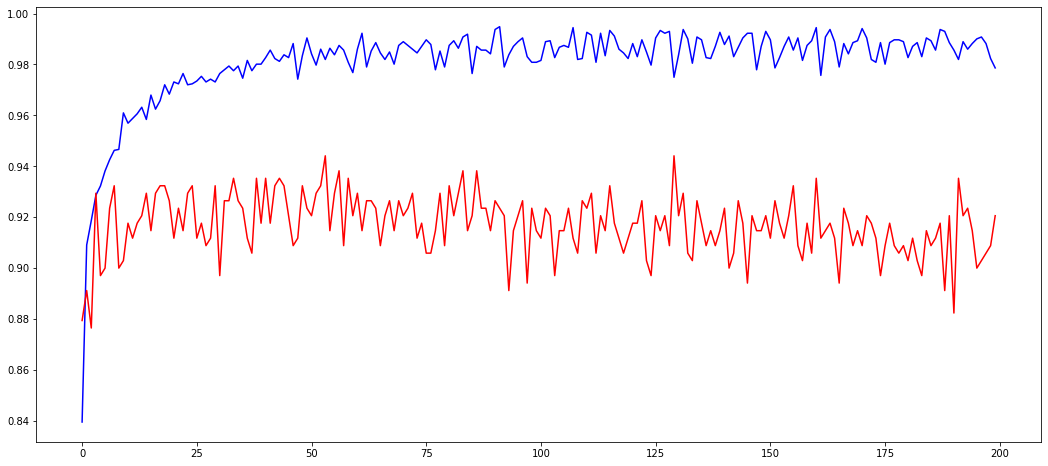

In [57]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(history.history["accuracy"], color="blue")
ax.plot(history.history["val_accuracy"], color="red")

print(history.history["accuracy"][-1])
print(history.history["val_accuracy"][-1])

## Same thing (No PCA)

In [2]:
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, compoundDataTest, 
                                                         compoundDataValidate, newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [5]:
inputDim = len(labelsTrain)


l1Reg = keras.regularizers.L1(.001)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inputDim, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(250, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(400, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(300, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(200, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(50, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(10, activation='relu', kernel_regularizer = l1Reg),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(trainData, trainClass, 
                    validation_data = (valData, valClass), epochs=200, batch_size=10)

Epoch 1/200
272/272 [==============================] - 6s 12ms/step - loss: 7.0084 - accuracy: 0.8690 - val_loss: 1.7978 - val_accuracy: 0.8647
Epoch 2/200
272/272 [==============================] - 3s 9ms/step - loss: 1.1824 - accuracy: 0.9039 - val_loss: 0.8741 - val_accuracy: 0.9118
Epoch 3/200
272/272 [==============================] - 3s 10ms/step - loss: 0.7307 - accuracy: 0.9150 - val_loss: 0.6691 - val_accuracy: 0.8941
Epoch 4/200
272/272 [==============================] - 3s 11ms/step - loss: 0.5798 - accuracy: 0.9198 - val_loss: 0.6056 - val_accuracy: 0.8765
Epoch 5/200
272/272 [==============================] - 3s 10ms/step - loss: 0.4997 - accuracy: 0.9356 - val_loss: 0.5260 - val_accuracy: 0.9000
Epoch 6/200
272/272 [==============================] - 3s 11ms/step - loss: 0.4587 - accuracy: 0.9360 - val_loss: 0.5017 - val_accuracy: 0.9206
Epoch 7/200
272/272 [==============================] - 3s 10ms/step - loss: 0.4277 - accuracy: 0.9441 - val_loss: 0.4475 - val_accuracy: 

272/272 [==============================] - 3s 11ms/step - loss: 0.2256 - accuracy: 0.9856 - val_loss: 0.4004 - val_accuracy: 0.9353
Epoch 58/200
272/272 [==============================] - 3s 10ms/step - loss: 0.2351 - accuracy: 0.9779 - val_loss: 0.4241 - val_accuracy: 0.9206
Epoch 59/200
272/272 [==============================] - 3s 10ms/step - loss: 0.2190 - accuracy: 0.9879 - val_loss: 0.4227 - val_accuracy: 0.9294
Epoch 60/200
272/272 [==============================] - 3s 10ms/step - loss: 0.2412 - accuracy: 0.9801 - val_loss: 0.4076 - val_accuracy: 0.9265
Epoch 61/200
272/272 [==============================] - 3s 11ms/step - loss: 0.2334 - accuracy: 0.9838 - val_loss: 0.4164 - val_accuracy: 0.9294
Epoch 62/200
272/272 [==============================] - 3s 10ms/step - loss: 0.2398 - accuracy: 0.9809 - val_loss: 0.4098 - val_accuracy: 0.9265
Epoch 63/200
272/272 [==============================] - 3s 10ms/step - loss: 0.2216 - accuracy: 0.9879 - val_loss: 0.4114 - val_accuracy: 0.941

272/272 [==============================] - 3s 12ms/step - loss: 0.1960 - accuracy: 0.9890 - val_loss: 0.4690 - val_accuracy: 0.9147
Epoch 114/200
272/272 [==============================] - 3s 11ms/step - loss: 0.1904 - accuracy: 0.9904 - val_loss: 0.4610 - val_accuracy: 0.9206
Epoch 115/200
272/272 [==============================] - 3s 12ms/step - loss: 0.2100 - accuracy: 0.9827 - val_loss: 0.4761 - val_accuracy: 0.9235
Epoch 116/200
272/272 [==============================] - 3s 13ms/step - loss: 0.2262 - accuracy: 0.9809 - val_loss: 0.4526 - val_accuracy: 0.9235
Epoch 117/200
272/272 [==============================] - 3s 12ms/step - loss: 0.2131 - accuracy: 0.9860 - val_loss: 0.4968 - val_accuracy: 0.9118
Epoch 118/200
272/272 [==============================] - 3s 13ms/step - loss: 0.2091 - accuracy: 0.9842 - val_loss: 0.4545 - val_accuracy: 0.9147
Epoch 119/200
272/272 [==============================] - 4s 14ms/step - loss: 0.1897 - accuracy: 0.9919 - val_loss: 0.5585 - val_accuracy:

272/272 [==============================] - 4s 13ms/step - loss: 0.2019 - accuracy: 0.9897 - val_loss: 0.4985 - val_accuracy: 0.9206
Epoch 170/200
272/272 [==============================] - 2s 9ms/step - loss: 0.2047 - accuracy: 0.9856 - val_loss: 0.4794 - val_accuracy: 0.9118
Epoch 171/200
272/272 [==============================] - 3s 12ms/step - loss: 0.1949 - accuracy: 0.9871 - val_loss: 0.4908 - val_accuracy: 0.9206
Epoch 172/200
272/272 [==============================] - 2s 9ms/step - loss: 0.2109 - accuracy: 0.9805 - val_loss: 0.4999 - val_accuracy: 0.9206
Epoch 173/200
272/272 [==============================] - 2s 9ms/step - loss: 0.2012 - accuracy: 0.9879 - val_loss: 0.4367 - val_accuracy: 0.9176
Epoch 174/200
272/272 [==============================] - 3s 9ms/step - loss: 0.1853 - accuracy: 0.9930 - val_loss: 0.4687 - val_accuracy: 0.9206
Epoch 175/200
272/272 [==============================] - 2s 9ms/step - loss: 0.1743 - accuracy: 0.9952 - val_loss: 0.5008 - val_accuracy: 0.91

0.9874861836433411 0.9959514141082764
0.9205882549285889 0.949999988079071


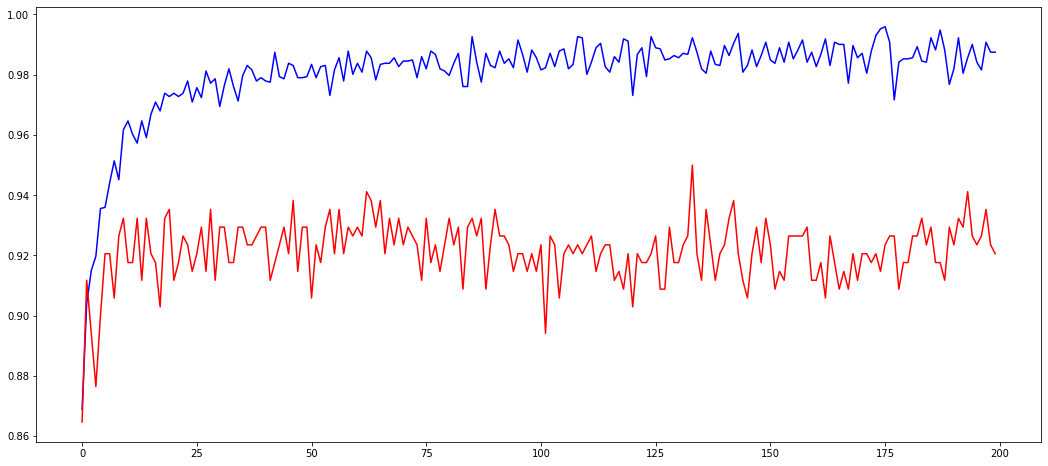

In [7]:
fig, ax = plt.subplots(figsize=(18,8))
ax.plot(history.history["accuracy"], color="blue")
ax.plot(history.history["val_accuracy"], color="red")

print(history.history["accuracy"][-1], max(history.history["accuracy"]))
print(history.history["val_accuracy"][-1], max(history.history["val_accuracy"]))

## Playing with SVM

In [ ]:
compoundsTrain, smilesTrain, labelsTrain, compoundDataTrain, activitiesTrain = Loader.getTrain(defaultValue=0)
compoundsTest, smilesTest, labelsTest, compoundDataTest, activitiesTest = Loader.getTest(defaultValue=0)
compoundsValidate, smilesValidate, labelsValidate, compoundDataValidate, activitiesValidate = Loader.getValidate(defaultValue=0)

trainData, testData, valData = Transformer.normalizeData(compoundDataTrain, compoundDataTest, 
                                                         compoundDataValidate, newMean=0, newStd=1)

trainClass = Transformer.toBinaryClassification(activitiesTrain)
testClass = Transformer.toBinaryClassification(activitiesTest)
valClass = Transformer.toBinaryClassification(activitiesValidate)

In [8]:
from sklearn import svm
from sklearn.metrics import accuracy_score

x = -.01
maxC=10**x

clf=svm.SVC(
    C=maxC,                          # The regularization parameter
    kernel='rbf',                   # The kernel type used 
    degree=4,                       # Degree of polynomial function 
    gamma='scale',                  # The kernel coefficient
    coef0=0.0,                      # If kernel = 'poly'/'sigmoid'
    shrinking=True,                 # To use shrinking heuristic
    probability=False,              # Enable probability estimates
    tol=0.001,                      # Stopping crierion
    cache_size=200,                 # Size of kernel cache
    class_weight=None,              # The weight of each class
    verbose=False,                  # Enable verbose output
    max_iter=- 1,                   # Hard limit on iterations
    decision_function_shape='ovr',  # One-vs-rest or one-vs-one
    break_ties=False,               # How to handle breaking ties
    random_state=None               # Random state of the model
)

#dataFrame = pd.DataFrame(trainDataPCA)
#dataFrame['labels'] = classTrain

#samp = int(len(df)*percent)
#df = df.sample(n = samp)
#print(len(df))
#Ytrain = df['labels']
#del df['labels']
#Xtrain = df.values

#train model
clf.fit(trainData, trainClass)

testPred = clf.predict(trainData)
valPred = clf.predict(valClass)
print("Percent: ", percent, " Len: ", samp, "Ein Acc: ", accuracy_score(Ytrain, predictions),
     "Eval Acc: ", accuracy_score(valClass, val_pred))